# Data Loading and Initial Exploration

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' column as the index
df.set_index('UTC', inplace=True)

# Display the first and last few rows of the DataFrame
print(df.head())
print(df.tail())

# Get a summary of the DataFrame
df.info()

                                 pID            Prd   PrdNorm         Irr
UTC                                                                      
2023-04-13 11:00:00+00:00  Bisceglie  780930.530000  0.791461  917.055833
2023-04-13 12:00:00+00:00  Bisceglie  743441.672500  0.753484  872.392333
2023-04-13 13:00:00+00:00  Bisceglie  578979.020833  0.586780  670.299333
2023-04-13 14:00:00+00:00  Bisceglie  415189.573333  0.420821  478.413500
2023-04-13 15:00:00+00:00  Bisceglie  530802.923333  0.537957  605.063667
                             pID         Prd  PrdNorm       Irr
UTC                                                            
2024-06-19 19:00:00+00:00  Celso  27114.7325  0.00452  5.538500
2024-06-19 20:00:00+00:00  Celso      0.0000  0.00000  0.338333
2024-06-19 21:00:00+00:00  Celso      0.0000  0.00000  0.320833
2024-06-19 22:00:00+00:00  Celso      0.0000  0.00000  0.307000
2024-06-19 23:00:00+00:00  Celso      0.0000  0.00000  0.294500
<class 'pandas.core.frame.DataFram

# DataFrame Summary

In [3]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


# Handling Missing Values

In [4]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = ['Prd', 'PrdNorm', 'Irr']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no more missing values
print(df.isnull().sum())

pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64
pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64


# Verifying and Correcting Data Types

In [5]:
# Verify data types
print(df.dtypes)

# Ensure all data types are as expected, for example, prd and Irr should be float
df['Prd'] = df['Prd'].astype(float)
df['Irr'] = df['Irr'].astype(float)
df['PrdNorm'] = df['PrdNorm'].astype(float)

# Verify the changes
print(df.dtypes)


pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object
pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object


# Verifying Normalization

In [6]:
# Verify the normalization
print(df['PrdNorm'].describe())

count    56007.000000
mean         0.162691
std          0.245157
min          0.000000
25%          0.000000
50%          0.000486
75%          0.290100
max          0.898216
Name: PrdNorm, dtype: float64


# Resampling Data to Daily Frequency
## Purpose
This code resamples the data to a daily frequency by summing the values for each day. This is particularly useful when working with time series data where daily aggregation of variables like production and irradiation is needed.

- **Resampling**: The `resample('D')` method is used to group the data by day, and the `sum()` function aggregates the values for each day.
- **Verification**: The first few rows of the resampled DataFrame are displayed to confirm the daily aggregation.

In [7]:
# Resample the data to daily production and irradiation
daily_df = df.resample('D').sum()

# Display the first few rows of the resampled DataFrame
print(daily_df.head())


                                                                         pID  \
UTC                                                                            
2023-04-13 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-14 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-15 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-16 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-17 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   

                                    Prd   PrdNorm          Irr  
UTC                                                             
2023-04-13 00:00:00+00:00  2.000873e+07  7.483768  8745.116870  
2023-04-14 00:00:00+00:00  2.737290e+07  6.198623  7305.307037  
2023-04-15 00:00:00+00:00  2.239684e+07  8.372315  9376.017170  
2023-04-16 00:00:00+00:00  1.527575e+07  6.041580  6571.661265  
2023-04-17 00:00:00+00:00  1.045721e+07  3.385164

# Generating Descriptive Statistics

In [8]:
# Generate descriptive statistics
daily_stats = daily_df.describe()
print(daily_stats)


                Prd     PrdNorm           Irr
count  4.340000e+02  434.000000    434.000000
mean   6.049409e+07   20.995030  25190.618963
std    3.167005e+07    9.611651  11863.851007
min    0.000000e+00    0.000000      0.000000
25%    3.726667e+07   12.985842  15604.705024
50%    5.625551e+07   20.953532  24682.439795
75%    7.993752e+07   27.567742  32963.240674
max    1.696259e+08   50.245950  61883.108917


# Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Univariate Analysis

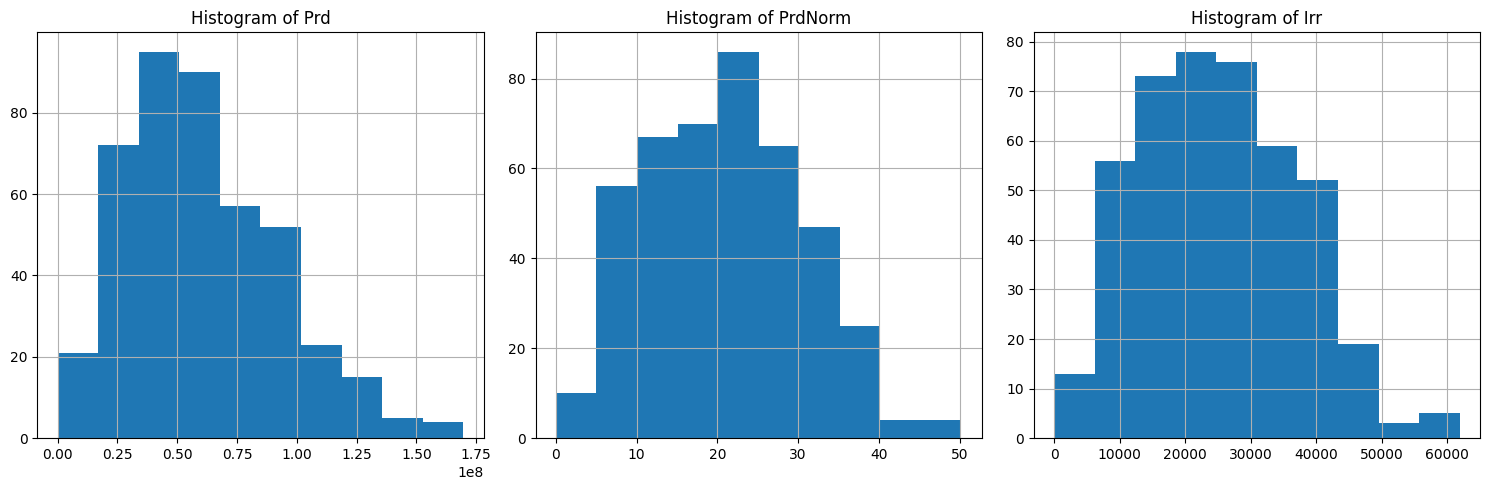

In [10]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
daily_df['Prd'].hist(ax=axes[0])
axes[0].set_title('Histogram of Prd')
daily_df['PrdNorm'].hist(ax=axes[1])
axes[1].set_title('Histogram of PrdNorm')
daily_df['Irr'].hist(ax=axes[2])
axes[2].set_title('Histogram of Irr')
plt.tight_layout()
plt.show()

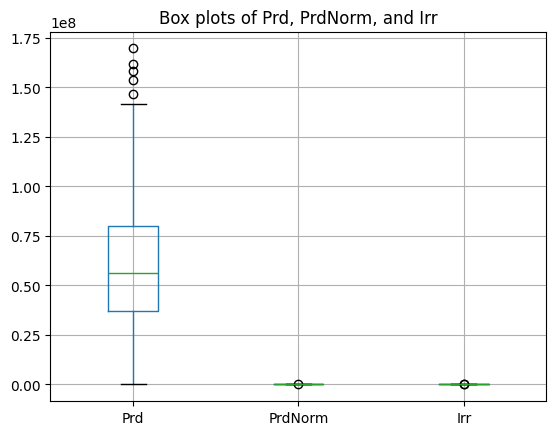

In [11]:
daily_df.boxplot(column=['Prd', 'PrdNorm', 'Irr'])
plt.title('Box plots of Prd, PrdNorm, and Irr')
plt.show()

# Bivariate Analysis

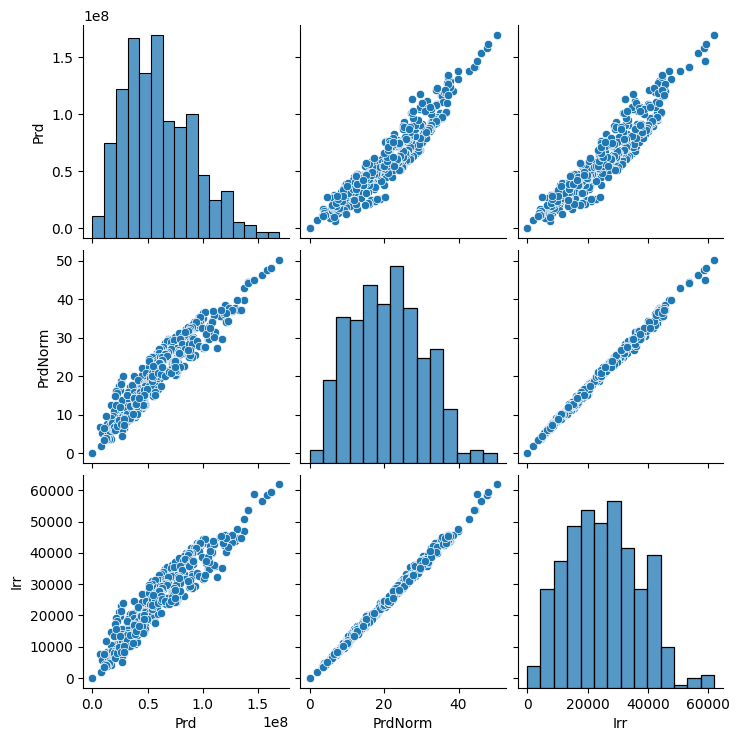

In [12]:
# Bivariate Analysis
sns.pairplot(daily_df[['Prd', 'PrdNorm', 'Irr']])
plt.show()

# Correlation Matrix

This code computes and visualizes the correlation matrix for the variables `'Prd'`, `'PrdNorm'`, and `'Irr'`. The correlation matrix provides insights into the linear relationships between these variables.

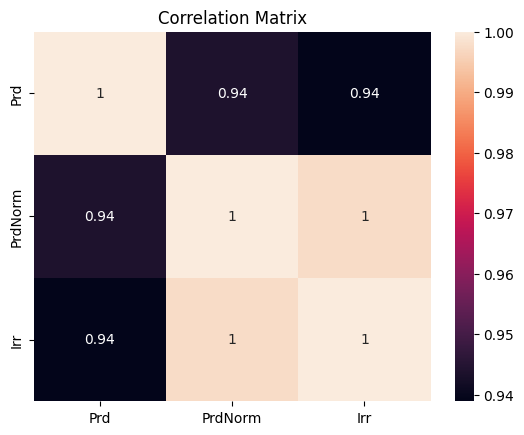

In [13]:
# Correlation Matrix
corr_matrix = daily_df[['Prd', 'PrdNorm', 'Irr']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Time Series Analysis

This code performs a time series analysis by plotting the variables `'Prd'`, `'PrdNorm'`, and `'Irr'` for a specific date (`'2024-02-17'`). The visualization helps to understand how these variables change over time on that particular day.

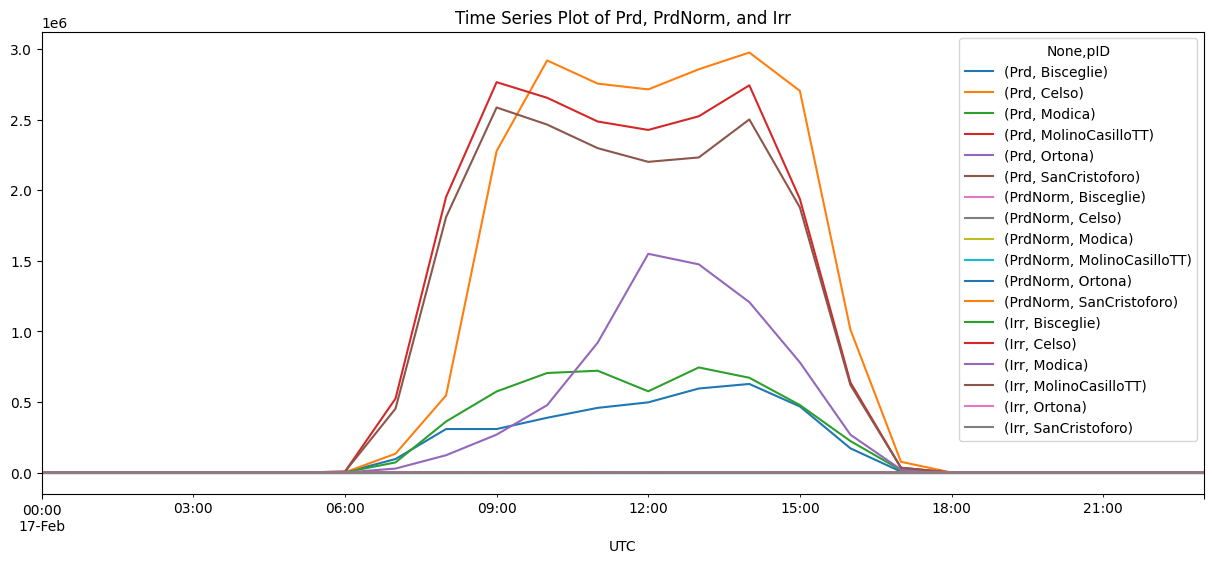

In [14]:
# Time Series Analysis
df.set_index('pID', append=True).unstack(level=1).sort_index().loc['2024-02-17'][['Prd', 'PrdNorm', 'Irr']].plot(figsize=(15, 6))

plt.title('Time Series Plot of Prd, PrdNorm, and Irr')
plt.show()


# Reshaping Data for Time Series Analysis

This code reshapes the DataFrame by setting an additional index (`'pID'`) and unstacking the data. This transformation prepares the DataFrame for time series analysis by organizing the data in a way that facilitates easier plotting and analysis of multiple variables.

In [15]:
df.set_index('pID', append=True).unstack(level=1)

Prd                                       \
pID                            Bisceglie       Celso   Modica MolinoCasilloTT   
UTC                                                                             
2023-04-13 11:00:00+00:00  780930.530000         NaN      NaN    3.167157e+06   
2023-04-13 12:00:00+00:00  743441.672500         NaN      NaN    3.112100e+06   
2023-04-13 13:00:00+00:00  578979.020833         NaN      NaN    3.126391e+06   
2023-04-13 14:00:00+00:00  415189.573333         NaN      NaN    2.061898e+06   
2023-04-13 15:00:00+00:00  530802.923333         NaN      NaN    2.355887e+06   
...                                  ...         ...      ...             ...   
2024-06-19 19:00:00+00:00    2787.246667  27114.7325  1416.39    1.169771e+04   
2024-06-19 20:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 21:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 22:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 23:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   

                                                        PrdNorm           \
pID                              Ortona SanCristoforo Bisceglie    Celso   
UTC                                                                        
2023-04-13 11:00:00+00:00      0.000000           NaN  0.791461      NaN   
2023-04-13 12:00:00+00:00      0.000000           NaN  0.753484      NaN   
2023-04-13 13:00:00+00:00      0.000000           NaN  0.586780      NaN   
2023-04-13 14:00:00+00:00      0.000000           NaN  0.420821      NaN   
2023-04-13 15:00:00+00:00      0.000000           NaN  0.537957      NaN   
...                                 ...           ...       ...      ...   
2024-06-19 19:00:00+00:00  13733.264167  15361.586667  0.002817  0.00452   
2024-06-19 20:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 21:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 22:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 23:00:00+00:00      0.000000      0.000000  0.000000  0.00000   

                                                                             \
pID                          Modica MolinoCasilloTT    Ortona SanCristoforo   
UTC                                                                           
2023-04-13 11:00:00+00:00       NaN        0.712887  0.000000           NaN   
2023-04-13 12:00:00+00:00       NaN        0.700477  0.000000           NaN   
2023-04-13 13:00:00+00:00       NaN        0.703715  0.000000           NaN   
2023-04-13 14:00:00+00:00       NaN        0.464113  0.000000           NaN   
2023-04-13 15:00:00+00:00       NaN        0.530251  0.000000           NaN   
...                             ...             ...       ...           ...   
2024-06-19 19:00:00+00:00  0.001419        0.002632  0.006091      0.003179   
2024-06-19 20:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 21:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 22:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 23:00:00+00:00  0.000000        0.000000  0.000000      0.000000   

                                  Irr                                      \
pID                         Bisceglie     Celso    Modica MolinoCasilloTT   
UTC                                                                         
2023-04-13 11:00:00+00:00  917.055833       NaN       NaN      809.252296   
2023-04-13 12:00:00+00:00  872.392333       NaN       NaN      798.701926   
2023-04-13 13:00:00+00:00  670.299333       NaN       NaN      821.734370   
2023-04-13 14:00:00+00:00  478.413500       NaN       NaN      520.583704   
2023-04-13 15:00:00+00:00  605.063667       NaN       NaN      614.145926   
...                               ...       ...       ...             ...   
2024-06-19 19:00:00+00:00    2.980667

# Time Series Plots for Daily Production and Irradiation

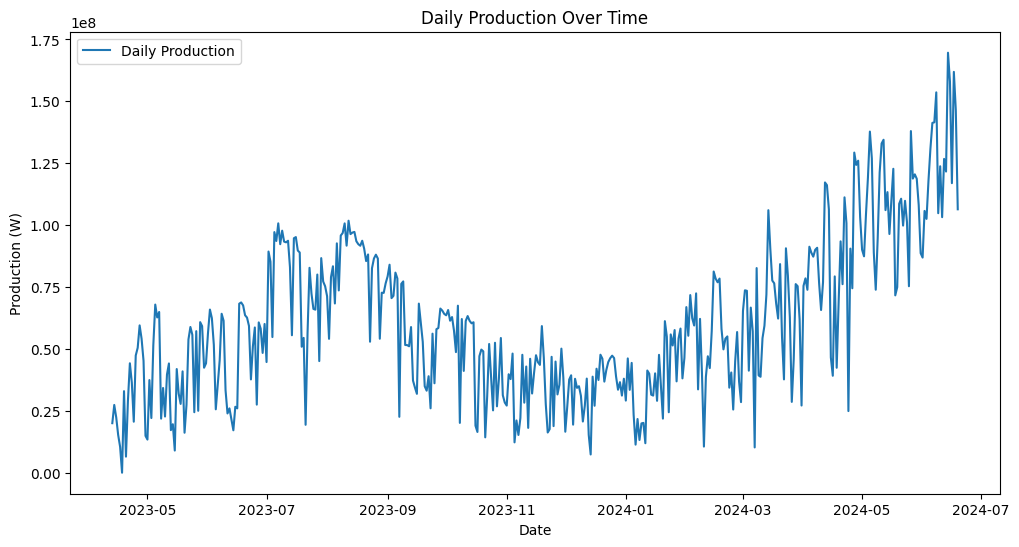

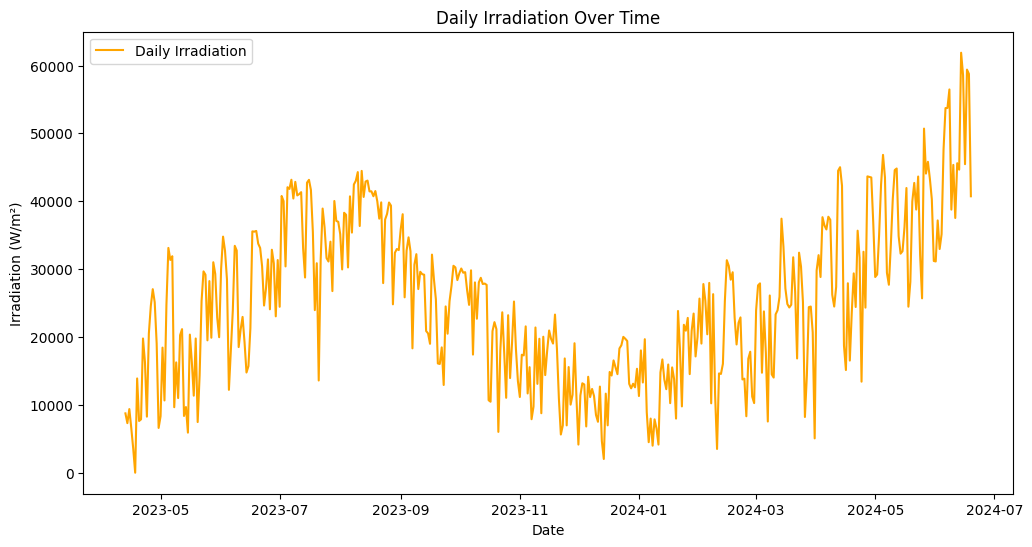

In [16]:
import matplotlib.pyplot as plt

# Plot daily production
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Prd'], label='Daily Production')
plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (W)')
plt.legend()
plt.show()

# Plot daily irradiation
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Irr'], label='Daily Irradiation', color='orange')
plt.title('Daily Irradiation Over Time')
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m²)')
plt.legend()
plt.show()


This code creates cyclical features from the timestamp index of the DataFrame, allowing for the modeling of seasonal patterns in time series data. By transforming time-related features using sine and cosine functions, it retains the cyclical nature of hours, days, months, and days of the week.

### Feature Creation
- **Extracting Time Components**: The following features are extracted from the DataFrame's index:
  - `hour`: Extracted from the index to represent the hour of the day.
  - `day`: Extracted to represent the day of the month.
  - `month`: Extracted to represent the month of the year.
  - `dayofweek`: Extracted to represent the day of the week (0=Monday, 6=Sunday).

### Feature Transformation
- **Sine and Cosine Transformation**: The extracted features are transformed using sine and cosine functions to capture their cyclical nature:
  - `hour_sin` and `hour_cos`: Represent the cyclical nature of hours in a day.
  - `day_sin` and `day_cos`: Represent the cyclical nature of days in a month.
  - `month_sin` and `month_cos`: Represent the cyclical nature of months in a year.
  - `dayofweek_sin` and `dayofweek_cos`: Represent the cyclical nature of days in a week.

### Dropping Original Columns
- The original time-related columns (`hour`, `day`, `month`, `dayofweek`) are dropped from the DataFrame to retain only the transformed cyclical features.


In [17]:
import numpy as np

# Creating cyclical features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

# Transforming the features using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# Dropping the original columns used for transformation
df.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)


# Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df[['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']]
y = df['PrdNorm']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X_train.shape

(44805, 9)

In [20]:
y_train.shape

(44805,)

In [21]:
df

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2023-04-13 11:00:00+00:00,Bisceglie,780930.530000,0.791461,917.055833,2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 12:00:00+00:00,Bisceglie,743441.672500,0.753484,872.392333,1.224647e-16,-1.000000,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 13:00:00+00:00,Bisceglie,578979.020833,0.586780,670.299333,-2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 14:00:00+00:00,Bisceglie,415189.573333,0.420821,478.413500,-5.000000e-01,-0.866025,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 15:00:00+00:00,Bisceglie,530802.923333,0.537957,605.063667,-7.071068e-01,-0.707107,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00+00:00,Celso,27114.732500,0.004520,5.538500,-9.659258e-01,0.258819,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 20:00:00+00:00,Celso,0.000000,0.000000,0.338333,-8.660254e-01,0.500000,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 21:00:00+00:00,Celso,0.000000,0.000000,0.320833,-7.071068e-01,0.707107,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [22]:
df.loc['2024-06-19 23:00:00+00:00']

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2024-06-19 23:00:00+00:00,Bisceglie,0.0,0.0,0.016833,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Modica,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Ortona,0.0,0.0,0.541000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,SanCristoforo,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,MolinoCasilloTT,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Celso,0.0,0.0,0.294500,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


# Importing Libraries for Model Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error
import numpy as np


# Defining the Mean Absolute Percentage Error Function

In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Random Forest Regression Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)

index = y_test>0.2

mape_rf = mean_absolute_percentage_error(y_test[index], y_pred_rf[index])
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}")

print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest - MAE: 0.008419122559803063, MAPE: 5.251368852770586
Random Forest - RMSE: 0.019134144225154307, R²: 0.993951071381657


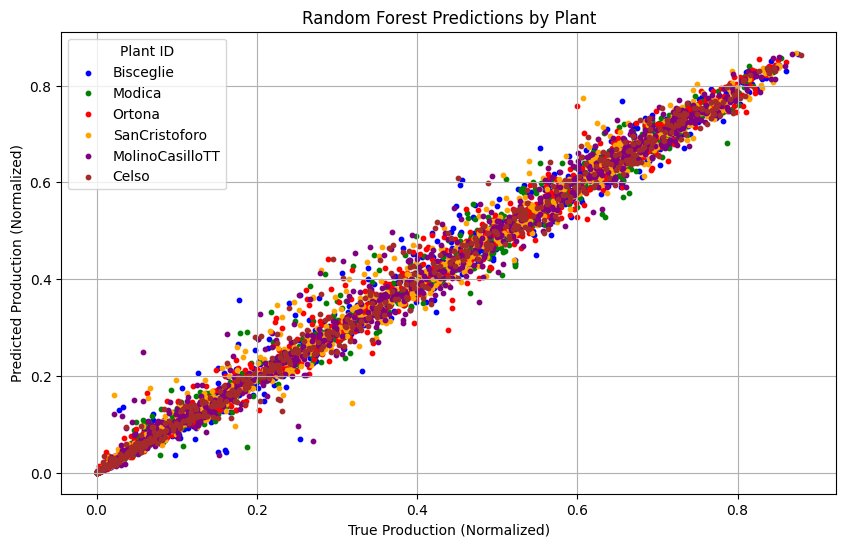

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_rf to a pandas Series if it's a NumPy array
if isinstance(y_pred_rf, np.ndarray):
    y_pred_rf = pd.Series(y_pred_rf)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Check that y_test and y_pred_rf are of the same length as X_test_with_pID
assert len(y_test) == len(y_pred_rf) == len(X_test_with_pID), "y_test, y_pred_rf, and X_test_with_pID must have the same length."

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_rf[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('Random Forest Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.show()


In [38]:
y_pred_rf.max()

0.8678254219227065

# Rotational Forest Regression Model

In [39]:
pip install scikit-plot


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [42]:
# Define a function for Rotational Forest Regressor
class RotationalForestRegressor:
    def __init__(self, n_estimators=100, random_state=None):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Create a random permutation of features
            permuted_indices = np.random.permutation(X.shape[1])
            model = RandomForestRegressor(random_state=self.random_state)
            model.fit(X[:, permuted_indices], y)
            self.models.append((model, permuted_indices))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, (model, indices) in enumerate(self.models):
            predictions[:, i] = model.predict(X[:, indices])
        return np.mean(predictions, axis=1)

In [43]:
# Initialize the Rotational Forest Regressor
rot_rf_model = RotationalForestRegressor(n_estimators=50, random_state=42)

In [44]:
# Train the model
rot_rf_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [49]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate MAPE
mape_rot_rf = mean_absolute_percentage_error(y_test, y_pred_rot_rf)

# Predictions
y_pred_rot_rf = rot_rf_model.predict(X_test.to_numpy())

# Evaluation
mse_rot_rf = mean_squared_error(y_test, y_pred_rot_rf)
rmse_rot_rf = np.sqrt(mse_rot_rf)
r2_rot_rf = r2_score(y_test, y_pred_rot_rf)
mae_rot_rf = mean_absolute_error(y_test, y_pred_rot_rf)

# Print evaluation metrics 
print(f"Rotational Forest - MAE: {mae_rot_rf}, RMSE: {rmse_rot_rf}, R²: {r2_rot_rf}, MAPE: {mape_rot_rf}")


Rotational Forest - MAE: 0.008416113463127543, RMSE: 0.019129619822759795, R²: 0.9939539316665122, MAPE: inf


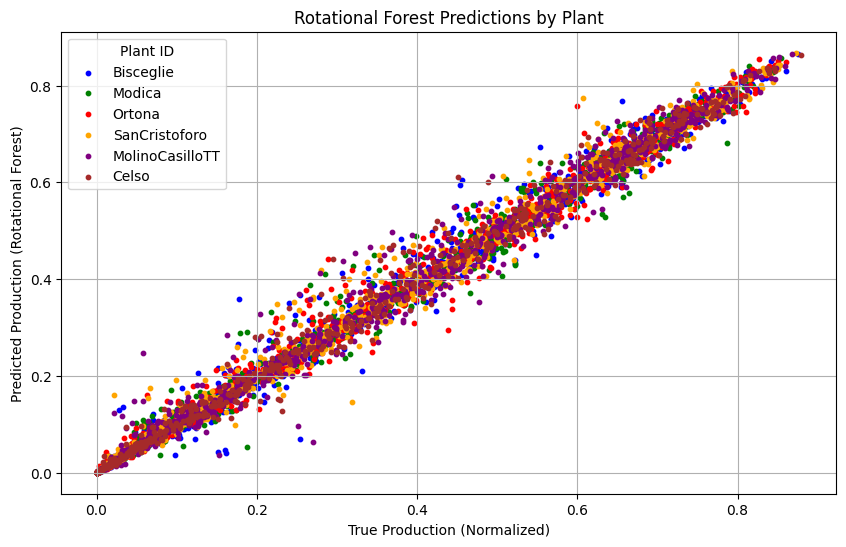

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_rot_rf to a pandas Series if it's a NumPy array
if isinstance(y_pred_rot_rf, np.ndarray):
    y_pred_rot_rf = pd.Series(y_pred_rot_rf)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Check that y_test and y_pred_rot_rf are of the same length as X_test_with_pID
assert len(y_test) == len(y_pred_rot_rf) == len(X_test_with_pID), "y_test, y_pred_rot_rf, and X_test_with_pID must have the same length."

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_rot_rf[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Rotational Forest)')
plt.title('Rotational Forest Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.show()


In [52]:
y_pred_rf.max()

0.8678254219227065

# XGBoost Regression Model

In [53]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)


# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {mae_xgb}, MAPE: {mape_xgb}")

print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost - MAE: 0.008378877107163696, MAPE: inf
XGBoost - RMSE: 0.018435691454507883, R²: 0.994384618908613


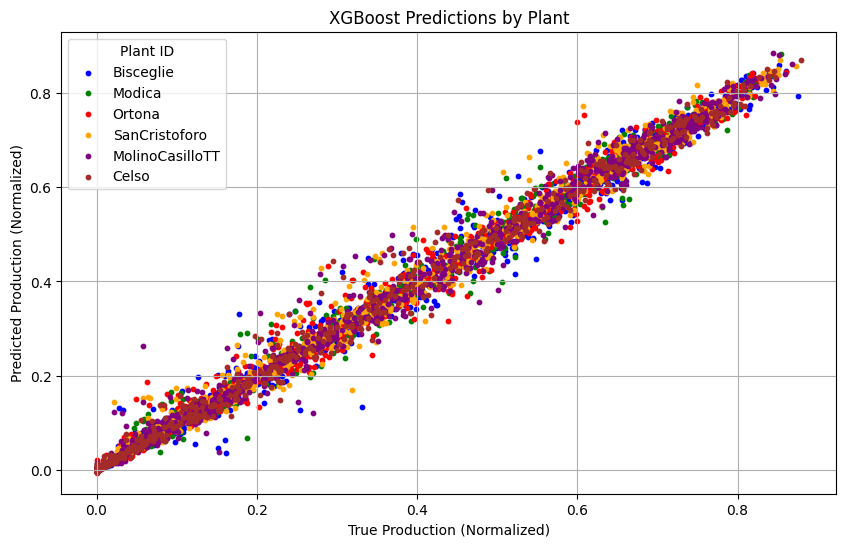

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_xgb to a pandas Series if it's a NumPy array
if isinstance(y_pred_xgb, np.ndarray):
    y_pred_xgb = pd.Series(y_pred_xgb)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Check that y_test and y_pred_xgb are of the same length as X_test_with_pID
assert len(y_test) == len(y_pred_xgb) == len(X_test_with_pID), "y_test, y_pred_xgb, and X_test_with_pID must have the same length."

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_xgb[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('XGBoost Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.show()


In [57]:
y_pred_rf.max()

0.8678254219227065

# Support Vector Regressor (SVR) Model

In [53]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Support Vector Regressor
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}")

print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}")


SVR - MAE: 0.07396383233621392, MAPE: inf
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855


SVR - MAE: 0.07396383233621392, MAPE: inf
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855


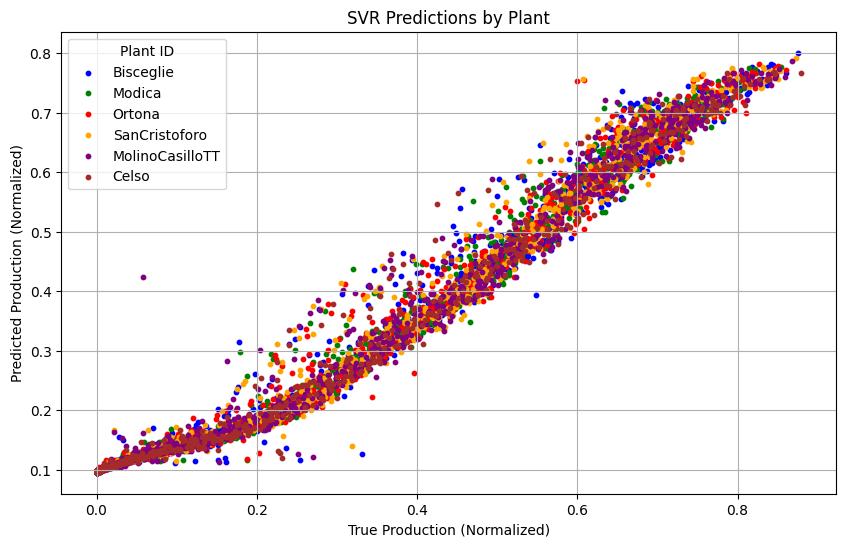

In [59]:
# Support Vector Regressor (SVR) Model
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Support Vector Regressor metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}")
print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}")

# Now create the scatter plot with colors for different plants
import matplotlib.pyplot as plt
import pandas as pd

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_svr to a pandas Series if it's a NumPy array
if isinstance(y_pred_svr, np.ndarray):
    y_pred_svr = pd.Series(y_pred_svr)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Check that y_test and y_pred_svr are of the same length as X_test_with_pID
assert len(y_test) == len(y_pred_svr) == len(X_test_with_pID), "y_test, y_pred_svr, and X_test_with_pID must have the same length."

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_svr[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SVR Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.show()


# Standard Neural Network (SNN) Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
snn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
snn_model.compile(optimizer='adam', loss='mse')

# Train the model
snn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_snn = snn_model.predict(X_test).flatten()

# Evaluation
mse_snn = mean_squared_error(y_test, y_pred_snn)
rmse_snn = mse_snn ** 0.5
r2_snn = r2_score(y_test, y_pred_snn)

# Standard Neural Network
mae_snn = mean_absolute_error(y_test, y_pred_snn)
mape_snn = mean_absolute_percentage_error(y_test, y_pred_snn)
print(f"SNN - MAE: {mae_snn}, MAPE: {mape_snn}")


print(f"SNN - RMSE: {rmse_snn}, R²: {r2_snn}")


/Users/shilpasrinivasareddy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/50
1121/1121 [==============================] - 1s 617us/step - loss: 2.9272 - val_loss: 0.0017
Epoch 2/50
1121/1121 [==============================] - 1s 522us/step - loss: 0.0029 - val_loss: 0.0010
Epoch 3/50
1121/1121 [==============================] - 1s 530us/step - loss: 0.0309 - val_loss: 0.0215
Epoch 4/50
1121/1121 [==============================] - 1s 543us/step - loss: 0.1981 - val_loss: 0.0020
Epoch 5/50
1121/1121 [==============================] - 1s 521us/step - loss: 0.1526 - val_loss: 0.0028
Epoch 6/50
1121/1121 [==============================] - 1s 551us/step - loss: 0.0789 - val_loss: 6.3153e-04
Epoch 7/50
1121/1121 [==============================] - 1s 558us/step - loss: 0.0876 - val_loss: 0.0017
Epoch 8/50
1121/1121 [==============================] - 1s 685us/step - loss: 0.1075 - val_loss: 0.0173
Epoch 9/50
1121/1121 [==============================] - 1s 581us/step - loss: 0.0681 - val_loss: 0.0074
Epoch 10/50
1121/1121 [==============================] - 1s 

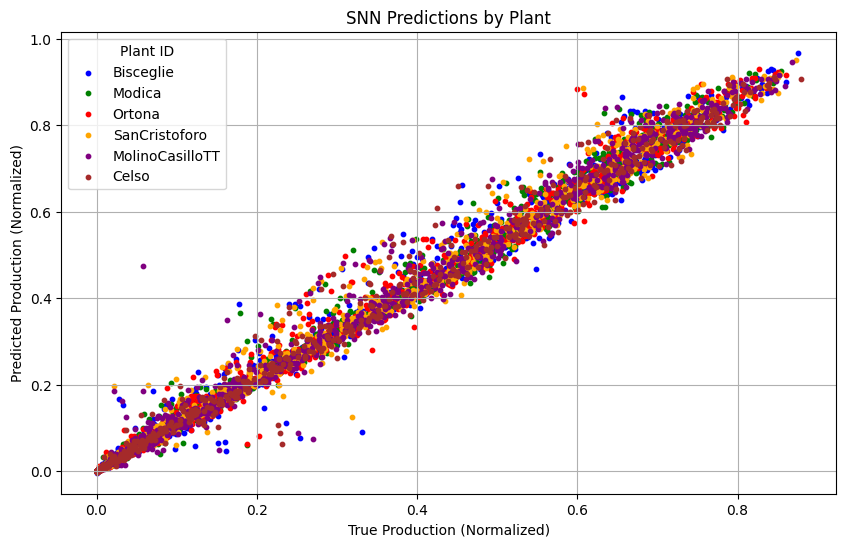

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_snn to a pandas Series if it's a NumPy array
if isinstance(y_pred_snn, np.ndarray):
    y_pred_snn = pd.Series(y_pred_snn)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Check that y_test and y_pred_snn are of the same length as X_test_with_pID
assert len(y_test) == len(y_pred_snn) == len(X_test_with_pID), "y_test, y_pred_snn, and X_test_with_pID must have the same length."

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_snn[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SNN Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.show()


# RNN

Training RNN for Plant ID: Bisceglie
Epoch 1/100
208/208 [==============================] - 5s 15ms/step - loss: 0.0431 - val_loss: 0.0179
Epoch 2/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0176 - val_loss: 0.0079
Epoch 3/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0113 - val_loss: 0.0076
Epoch 4/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0105 - val_loss: 0.0065
Epoch 5/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 6/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 7/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0088 - val_loss: 0.0056
Epoch 8/100
208/208 [==============================] - 3s 14ms/step - loss: 0.0083 - val_loss: 0.0066
Epoch 9/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 10/100
208/208 [=======================

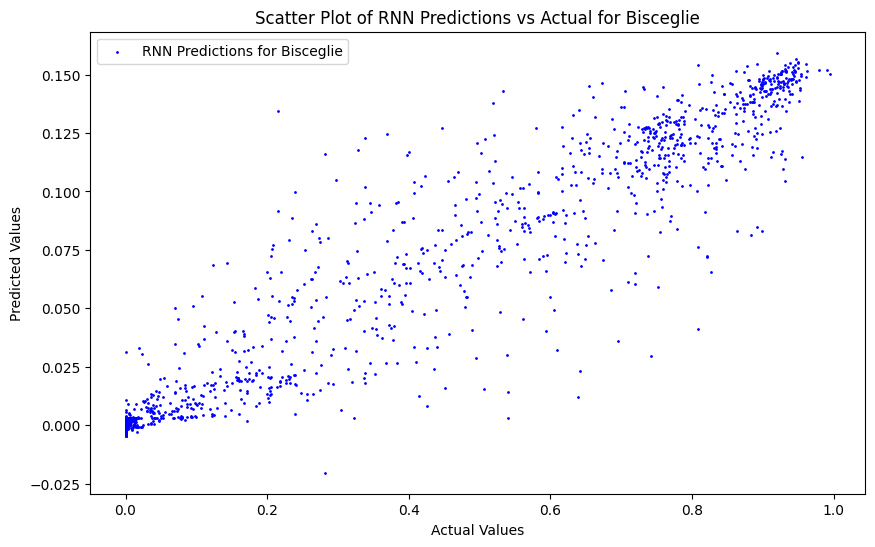

Training RNN for Plant ID: Modica
Epoch 1/100
200/200 [==============================] - 5s 15ms/step - loss: 0.0365 - val_loss: 0.0138
Epoch 2/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 3/100
200/200 [==============================] - 3s 15ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 4/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 5/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 6/100
200/200 [==============================] - 3s 14ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 7/100
200/200 [==============================] - 3s 14ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 8/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/100
200/200 [==============================] - 3s 13ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 10/100
200/200 [==========================

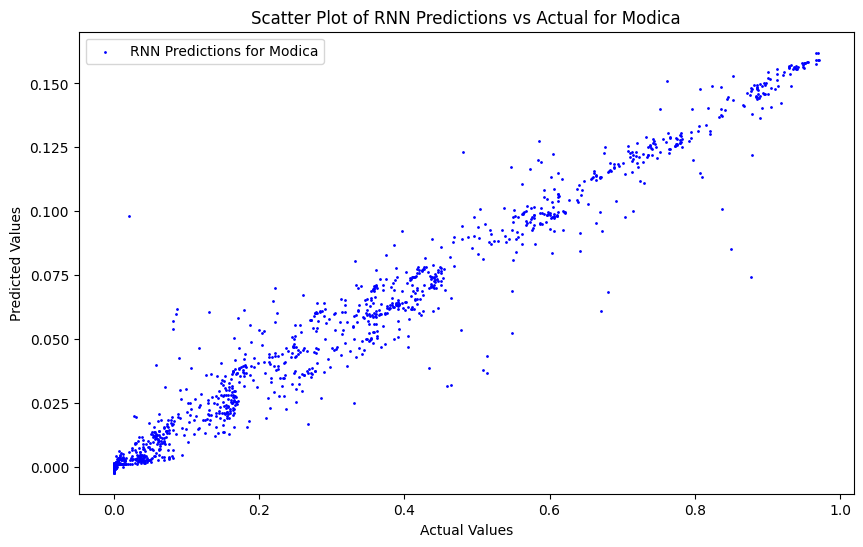

Training RNN for Plant ID: Ortona
Epoch 1/100
208/208 [==============================] - 5s 15ms/step - loss: 0.0267 - val_loss: 0.0152
Epoch 2/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 3/100
208/208 [==============================] - 3s 14ms/step - loss: 0.0063 - val_loss: 0.0070
Epoch 4/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0058 - val_loss: 0.0066
Epoch 5/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 6/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0049 - val_loss: 0.0061
Epoch 7/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0048 - val_loss: 0.0051
Epoch 8/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 9/100
208/208 [==============================] - 3s 14ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 10/100
208/208 [==========================

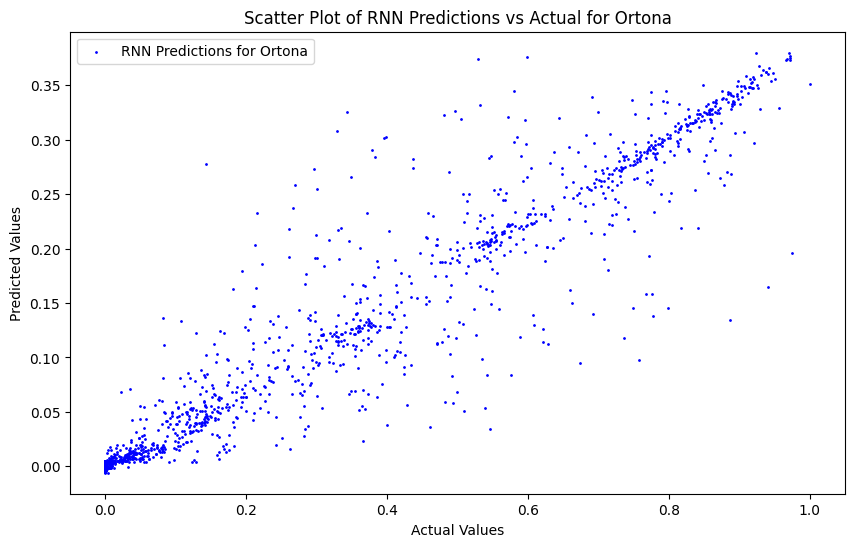

Training RNN for Plant ID: SanCristoforo
Epoch 1/100
185/185 [==============================] - 5s 17ms/step - loss: 0.0323 - val_loss: 0.0173
Epoch 2/100
185/185 [==============================] - 3s 16ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 3/100
185/185 [==============================] - 3s 16ms/step - loss: 0.0078 - val_loss: 0.0093
Epoch 4/100
185/185 [==============================] - 3s 15ms/step - loss: 0.0068 - val_loss: 0.0087
Epoch 5/100
185/185 [==============================] - 2s 13ms/step - loss: 0.0066 - val_loss: 0.0090
Epoch 6/100
185/185 [==============================] - 3s 14ms/step - loss: 0.0066 - val_loss: 0.0084
Epoch 7/100
185/185 [==============================] - 3s 16ms/step - loss: 0.0061 - val_loss: 0.0084
Epoch 8/100
185/185 [==============================] - 3s 17ms/step - loss: 0.0060 - val_loss: 0.0079
Epoch 9/100
185/185 [==============================] - 3s 16ms/step - loss: 0.0059 - val_loss: 0.0076
Epoch 10/100
185/185 [===================

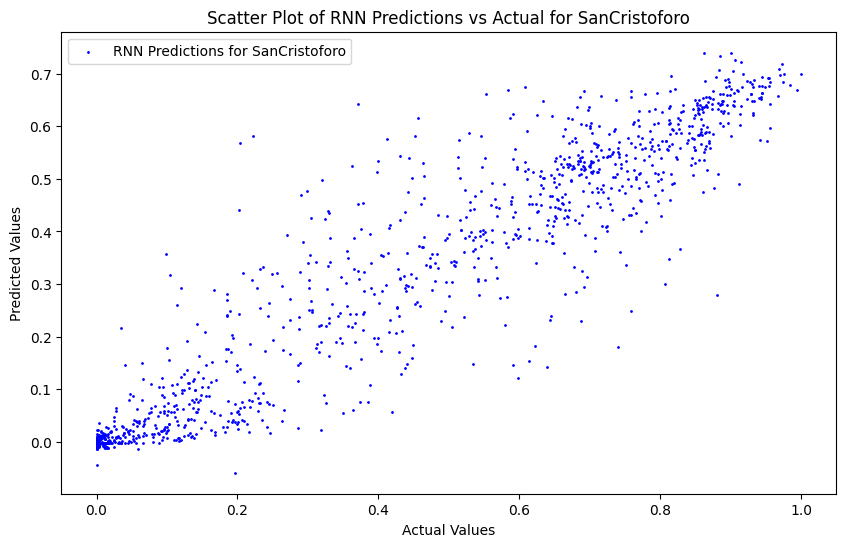

Training RNN for Plant ID: MolinoCasilloTT
Epoch 1/100
208/208 [==============================] - 5s 16ms/step - loss: 0.0428 - val_loss: 0.0176
Epoch 2/100
208/208 [==============================] - 4s 17ms/step - loss: 0.0163 - val_loss: 0.0084
Epoch 3/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0120 - val_loss: 0.0078
Epoch 4/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 5/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 6/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0102 - val_loss: 0.0065
Epoch 7/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0094 - val_loss: 0.0079
Epoch 8/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0094 - val_loss: 0.0060
Epoch 9/100
208/208 [==============================] - 3s 15ms/step - loss: 0.0088 - val_loss: 0.0057
Epoch 10/100
208/208 [=================

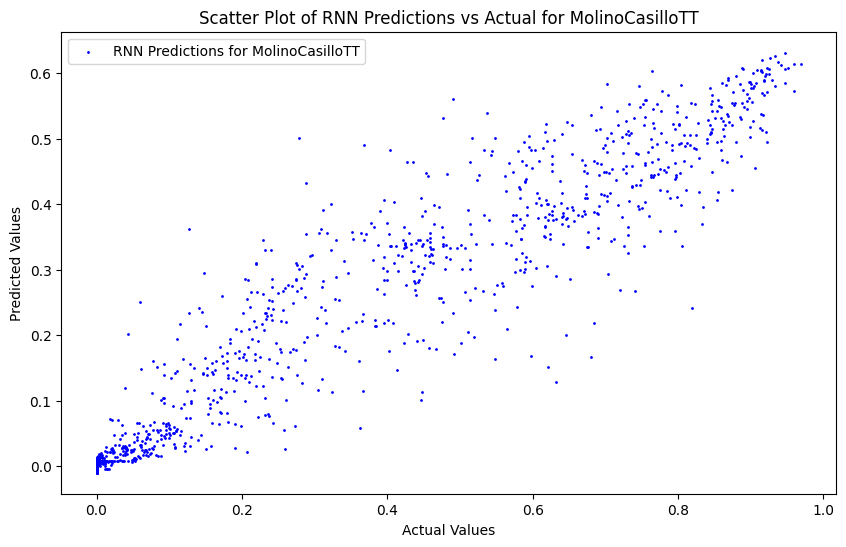

Training RNN for Plant ID: Celso
Epoch 1/100
112/112 [==============================] - 4s 19ms/step - loss: 0.0243 - val_loss: 0.0402
Epoch 2/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0128 - val_loss: 0.0254
Epoch 3/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0096 - val_loss: 0.0240
Epoch 4/100
112/112 [==============================] - 2s 18ms/step - loss: 0.0077 - val_loss: 0.0206
Epoch 5/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0067 - val_loss: 0.0163
Epoch 6/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0063 - val_loss: 0.0150
Epoch 7/100
112/112 [==============================] - 2s 16ms/step - loss: 0.0061 - val_loss: 0.0099
Epoch 8/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0058 - val_loss: 0.0096
Epoch 9/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0058 - val_loss: 0.0114
Epoch 10/100
112/112 [===========================

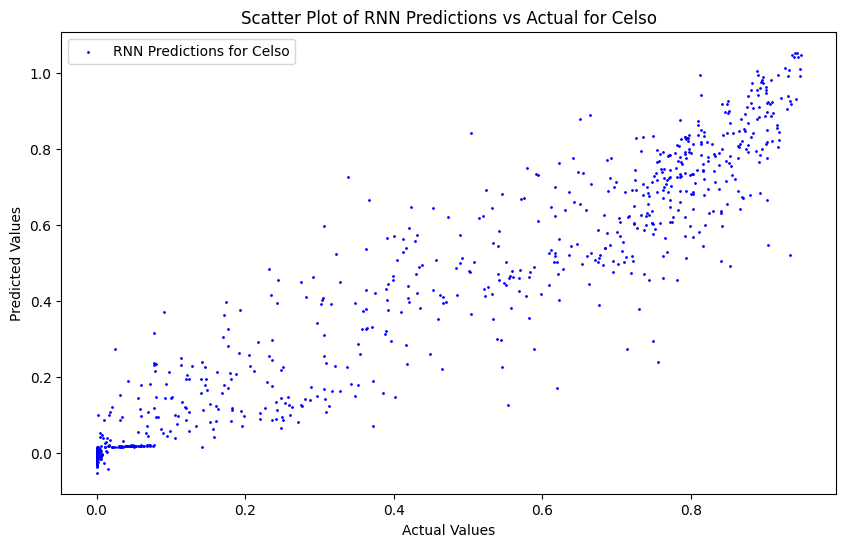

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Replace with your dataset
plant_ids = df['pID'].unique()  # Assuming pID contains the plant identifiers

# Scaling the target variable and checking for outliers
scaler = MinMaxScaler()
df['Prd'] = scaler.fit_transform(df[['Prd']])  # Normalize Prd values

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training RNN for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    time_step = 10  # Adjust the time step as needed
    X, y = create_dataset(scaled_data, time_step)

    if len(X) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Reshape the data
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Define the RNN model with more complexity
    rnn_model = Sequential([
        LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(75, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)  # Linear activation for output
    ])

    # Compile the model
    rnn_model.compile(optimizer='adam', loss='mean_squared_error')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Predictions
    y_pred_rnn = rnn_model.predict(X_test)

    # Inverse scaling
    y_pred_rnn_inverse = scaler.inverse_transform(y_pred_rnn)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_rnn_inverse)
    mape = mean_absolute_percentage_error(y_test, y_pred_rnn_inverse)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnn_inverse))
    r2 = r2_score(y_test, y_pred_rnn_inverse)

    print(f"Metrics for Plant ID {plant_id}:")
    print(f"MAE: {mae}, MAPE: {mape}, RMSE: {rmse}, R²: {r2}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rnn_inverse, s=1, color='blue', label=f'RNN Predictions for {plant_id}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of RNN Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()


## Using Keras Tuner for Hyperparameter Tuning

In [95]:
pip install keras-tuner


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Trial 10 Complete [00h 01m 24s]
val_loss: 0.007890867069363594

Best val_loss So Far: 0.0075732318218797445
Total elapsed time: 00h 14m 06s
Best Hyperparameters for Plant Celso:
Units: 150
Dropout Rate 1: 0.1
Epoch 1/50
112/112 [==============================] - 3s 16ms/step - loss: 0.0153 - val_loss: 0.0263
Epoch 2/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0067 - val_loss: 0.0132
Epoch 3/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0057 - val_loss: 0.0167
Epoch 4/50
112/112 [==============================] - 2s 16ms/step - loss: 0.0056 - val_loss: 0.0115
Epoch 5/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0056 - val_loss: 0.0142
Epoch 6/50
112/112 [==============================] - 2s 13ms/step - loss: 0.0052 - val_loss: 0.0159
Epoch 7/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0049 - val_loss: 0.0095
Epoch 8/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0047 - 

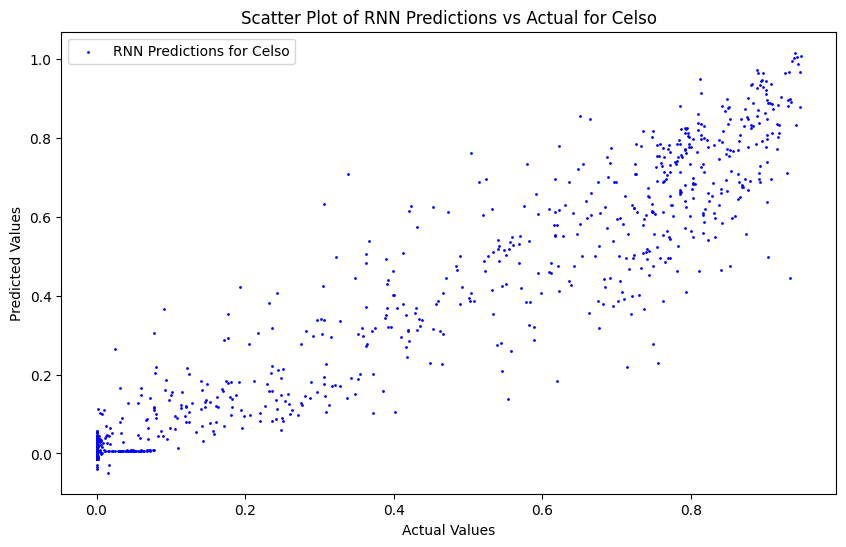

In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from kerastuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Replace with your dataset
plant_ids = df['pID'].unique()  # Assuming pID contains the plant identifiers

# Scaling the target variable
scaler = MinMaxScaler()
df['Prd'] = scaler.fit_transform(df[['Prd']])  # Normalize Prd values

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define a function to build the LSTM model for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Hyperparameter tuning for LSTM units and Dropout rate
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=50), 
                   return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Adding an additional LSTM layer based on hyperparameter choice
    if hp.Boolean('add_lstm_layer'):
        model.add(LSTM(units=hp.Int('units_layer_2', min_value=50, max_value=100, step=25), 
                       return_sequences=False))
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))
    else:
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=50), 
                       return_sequences=False))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile the model with 'adam' optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training RNN for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    time_step = 10  # Adjust the time step as needed
    X, y = create_dataset(scaled_data, time_step)

    if len(X) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Reshape the data
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Initialize Keras Tuner RandomSearch
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,  # Number of hyperparameter combinations to try
        executions_per_trial=2,  # Average over multiple runs to reduce variance
        directory='rnn_tuning',
        project_name=f'plant_rnn_{plant_id}'
    )

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Perform the hyperparameter search
    tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"Best Hyperparameters for Plant {plant_id}:")
    print(f"Units: {best_hps.get('units')}")
    if best_hps.get('add_lstm_layer'):
        print(f"Additional LSTM Layer Units: {best_hps.get('units_layer_2')}")
    print(f"Dropout Rate 1: {best_hps.get('dropout_rate_1')}")
    if best_hps.get('add_lstm_layer'):
        print(f"Dropout Rate 2: {best_hps.get('dropout_rate_2')}")

    # Build the model with the best hyperparameters
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

    # Predictions
    y_pred_rnn = best_model.predict(X_test)

    # Inverse scaling
    y_pred_rnn_inverse = scaler.inverse_transform(y_pred_rnn)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_rnn_inverse)
    mape = mean_absolute_percentage_error(y_test, y_pred_rnn_inverse)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnn_inverse))
    r2 = r2_score(y_test, y_pred_rnn_inverse)

    print(f"Metrics for Plant ID {plant_id}:")
    print(f"MAE: {mae}, MAPE: {mape}, RMSE: {rmse}, R²: {r2}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rnn_inverse, s=1, color='blue', label=f'RNN Predictions for {plant_id}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of RNN Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()


Training RNN for Plant ID: Bisceglie
Reloading Tuner from rnn_tuning/plant_rnn_Bisceglie/tuner0.json
Best Hyperparameters for Plant Bisceglie:
Units: 100
Dropout Rate 1: 0.30000000000000004
Epoch 1/50
208/208 [==============================] - 5s 11ms/step - loss: 0.0295 - val_loss: 0.0126
Epoch 2/50
208/208 [==============================] - 2s 10ms/step - loss: 0.0122 - val_loss: 0.0080
Epoch 3/50
208/208 [==============================] - 2s 10ms/step - loss: 0.0098 - val_loss: 0.0065
Epoch 4/50
208/208 [==============================] - 2s 9ms/step - loss: 0.0089 - val_loss: 0.0062
Epoch 5/50
208/208 [==============================] - 2s 8ms/step - loss: 0.0083 - val_loss: 0.0059
Epoch 6/50
208/208 [==============================] - 2s 9ms/step - loss: 0.0079 - val_loss: 0.0086
Epoch 7/50
208/208 [==============================] - 2s 8ms/step - loss: 0.0074 - val_loss: 0.0057
Epoch 8/50
208/208 [==============================] - 2s 8ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 9

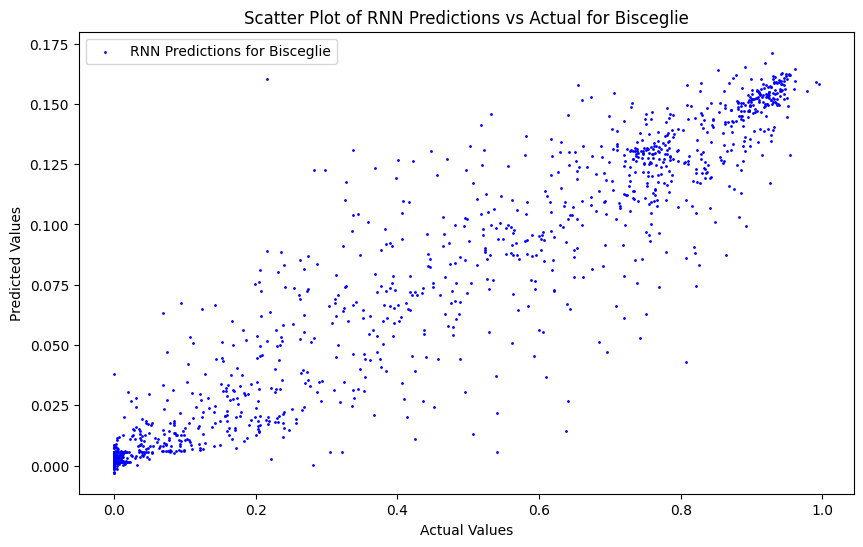

Training RNN for Plant ID: Modica
Reloading Tuner from rnn_tuning/plant_rnn_Modica/tuner0.json
Best Hyperparameters for Plant Modica:
Units: 150
Dropout Rate 1: 0.2
Epoch 1/50
200/200 [==============================] - 5s 16ms/step - loss: 0.0199 - val_loss: 0.0089
Epoch 2/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0064 - val_loss: 0.0069
Epoch 3/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0054 - val_loss: 0.0077
Epoch 4/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 5/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 6/50
200/200 [==============================] - 3s 15ms/step - loss: 0.0045 - val_loss: 0.0067
Epoch 7/50
200/200 [==============================] - 3s 14ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 8/50
200/200 [==============================] - 3s 13ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 9/50
200/200 [=======

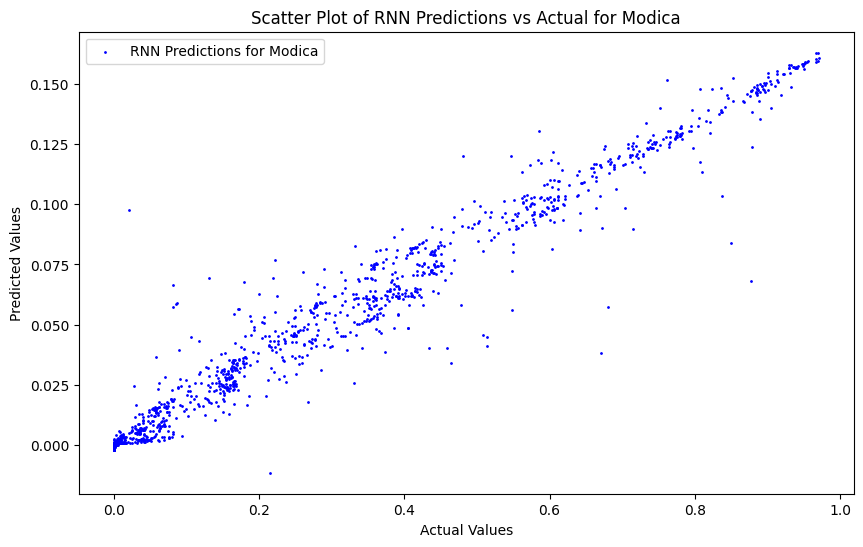

Training RNN for Plant ID: Ortona
Reloading Tuner from rnn_tuning/plant_rnn_Ortona/tuner0.json
Best Hyperparameters for Plant Ortona:
Units: 150
Additional LSTM Layer Units: 75
Dropout Rate 1: 0.2
Dropout Rate 2: 0.1
Epoch 1/50
208/208 [==============================] - 5s 15ms/step - loss: 0.0193 - val_loss: 0.0095
Epoch 2/50
208/208 [==============================] - 2s 11ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 3/50
208/208 [==============================] - 2s 12ms/step - loss: 0.0054 - val_loss: 0.0071
Epoch 4/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0051 - val_loss: 0.0069
Epoch 5/50
208/208 [==============================] - 2s 12ms/step - loss: 0.0046 - val_loss: 0.0062
Epoch 6/50
208/208 [==============================] - 2s 11ms/step - loss: 0.0046 - val_loss: 0.0069
Epoch 7/50
208/208 [==============================] - 2s 10ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 8/50
208/208 [==============================] - 2s 11ms/step - loss: 0

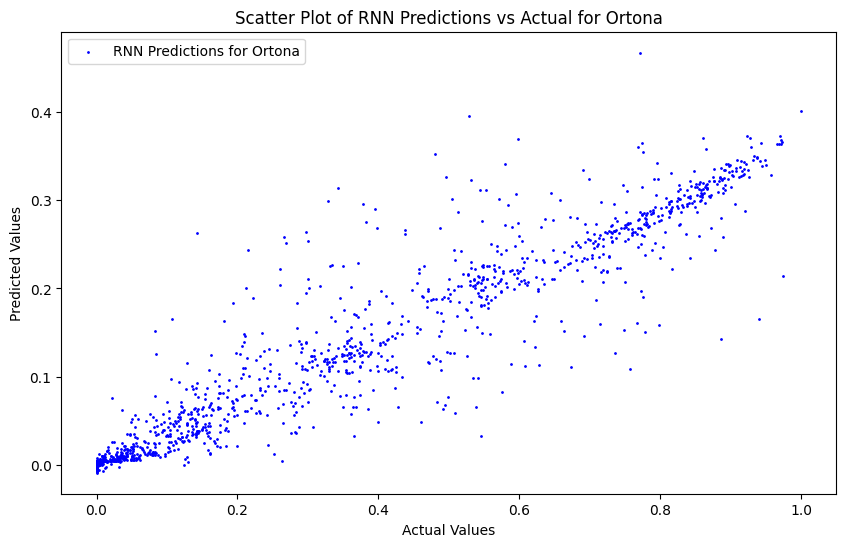

Training RNN for Plant ID: SanCristoforo
Reloading Tuner from rnn_tuning/plant_rnn_SanCristoforo/tuner0.json
Best Hyperparameters for Plant SanCristoforo:
Units: 100
Additional LSTM Layer Units: 50
Dropout Rate 1: 0.2
Dropout Rate 2: 0.1
Epoch 1/50
185/185 [==============================] - 3s 9ms/step - loss: 0.0254 - val_loss: 0.0158
Epoch 2/50
185/185 [==============================] - 1s 7ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 3/50
185/185 [==============================] - 1s 8ms/step - loss: 0.0073 - val_loss: 0.0093
Epoch 4/50
185/185 [==============================] - 2s 9ms/step - loss: 0.0066 - val_loss: 0.0092
Epoch 5/50
185/185 [==============================] - 1s 7ms/step - loss: 0.0061 - val_loss: 0.0092
Epoch 6/50
185/185 [==============================] - 1s 7ms/step - loss: 0.0059 - val_loss: 0.0089
Epoch 7/50
185/185 [==============================] - 1s 7ms/step - loss: 0.0058 - val_loss: 0.0083
Epoch 8/50
185/185 [==============================] - 1s 8ms/s

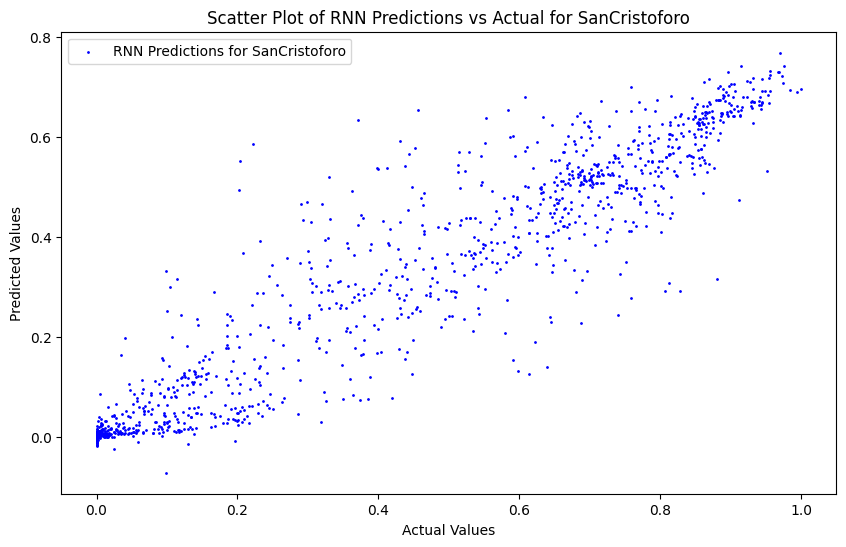

Training RNN for Plant ID: MolinoCasilloTT
Reloading Tuner from rnn_tuning/plant_rnn_MolinoCasilloTT/tuner0.json
Best Hyperparameters for Plant MolinoCasilloTT:
Units: 150
Dropout Rate 1: 0.1
Epoch 1/50
208/208 [==============================] - 5s 15ms/step - loss: 0.0246 - val_loss: 0.0098
Epoch 2/50
208/208 [==============================] - 3s 15ms/step - loss: 0.0106 - val_loss: 0.0085
Epoch 3/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0097 - val_loss: 0.0125
Epoch 4/50
208/208 [==============================] - 3s 14ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 5/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0080 - val_loss: 0.0093
Epoch 6/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 7/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 8/50
208/208 [==============================] - 3s 13ms/step - loss: 0.0072 - val_loss: 0.0069


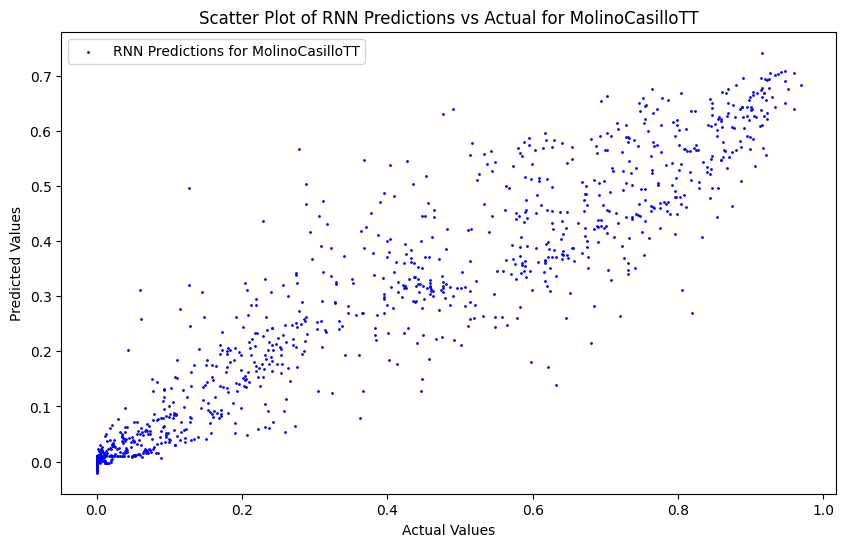

Training RNN for Plant ID: Celso
Reloading Tuner from rnn_tuning/plant_rnn_Celso/tuner0.json
Best Hyperparameters for Plant Celso:
Units: 150
Dropout Rate 1: 0.1
Epoch 1/50
112/112 [==============================] - 4s 19ms/step - loss: 0.0159 - val_loss: 0.0325
Epoch 2/50
112/112 [==============================] - 2s 13ms/step - loss: 0.0073 - val_loss: 0.0112
Epoch 3/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0059 - val_loss: 0.0158
Epoch 4/50
112/112 [==============================] - 2s 16ms/step - loss: 0.0055 - val_loss: 0.0108
Epoch 5/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0053 - val_loss: 0.0113
Epoch 6/50
112/112 [==============================] - 2s 14ms/step - loss: 0.0053 - val_loss: 0.0108
Epoch 7/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0052 - val_loss: 0.0129
Epoch 8/50
112/112 [==============================] - 1s 13ms/step - loss: 0.0049 - val_loss: 0.0185
Epoch 9/50
112/112 [==========

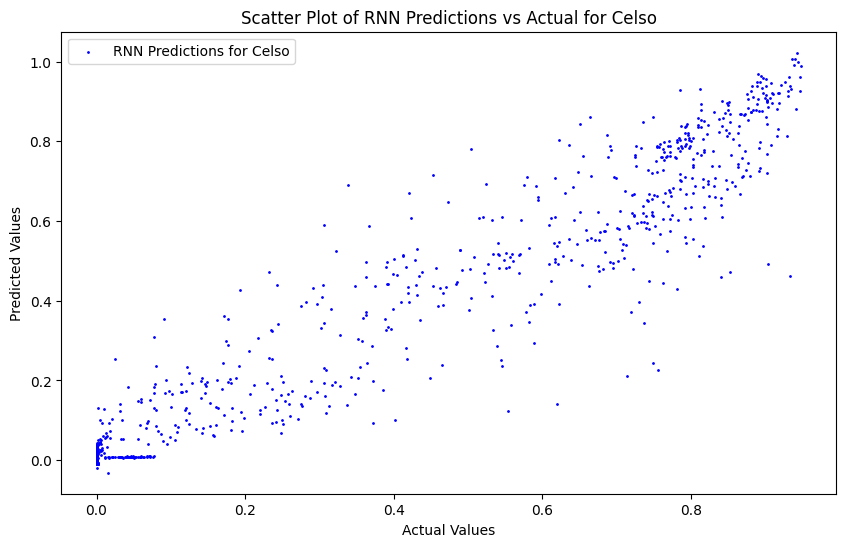

In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from kerastuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


plant_ids = df['pID'].unique()  

# Scaling the target variable
scaler = MinMaxScaler()
df['Prd'] = scaler.fit_transform(df[['Prd']])  # Normalize Prd values

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define a function to build the LSTM model for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Hyperparameter tuning for LSTM units and Dropout rate
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=50), 
                   return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.1, max_value=0.5, step=0.1)))
    
    # Adding an additional LSTM layer based on hyperparameter choice
    if hp.Boolean('add_lstm_layer'):
        model.add(LSTM(units=hp.Int('units_layer_2', min_value=50, max_value=100, step=25), 
                       return_sequences=False))
        model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.1, max_value=0.5, step=0.1)))
    else:
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=50), 
                       return_sequences=False))
    
    # Output layer
    model.add(Dense(1))
    
    # Compile the model with 'adam' optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training RNN for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    time_step = 10  # Adjust the time step as needed
    X, y = create_dataset(scaled_data, time_step)

    if len(X) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Reshape the data
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Initialize Keras Tuner RandomSearch
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,  # Number of hyperparameter combinations to try
        executions_per_trial=2,  # Average over multiple runs to reduce variance
        directory='rnn_tuning',
        project_name=f'plant_rnn_{plant_id}'
    )

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Perform the hyperparameter search
    tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

    # Get the optimal hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"Best Hyperparameters for Plant {plant_id}:")
    print(f"Units: {best_hps.get('units')}")
    if best_hps.get('add_lstm_layer'):
        print(f"Additional LSTM Layer Units: {best_hps.get('units_layer_2')}")
    print(f"Dropout Rate 1: {best_hps.get('dropout_rate_1')}")
    if best_hps.get('add_lstm_layer'):
        print(f"Dropout Rate 2: {best_hps.get('dropout_rate_2')}")

    # Build the model with the best hyperparameters
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

    # Predictions
    y_pred_rnn = best_model.predict(X_test)

    # Inverse scaling
    y_pred_rnn_inverse = scaler.inverse_transform(y_pred_rnn)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_rnn_inverse)
    mape = mean_absolute_percentage_error(y_test, y_pred_rnn_inverse)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnn_inverse))
    r2 = r2_score(y_test, y_pred_rnn_inverse)

    print(f"Metrics for Plant ID {plant_id}:")
    print(f"MAE: {mae}, MAPE: {mape}, RMSE: {rmse}, R²: {r2}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rnn_inverse, s=1, color='blue', label=f'RNN Predictions for {plant_id}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of RNN Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()


# Transformer Model

Training Transformer Model for Plant ID: Bisceglie
Epoch 1/50
208/208 [==============================] - 1s 3ms/step - loss: 0.1782 - val_loss: 0.0208
Epoch 2/50
208/208 [==============================] - 1s 4ms/step - loss: 0.0416 - val_loss: 0.0187
Epoch 3/50
208/208 [==============================] - 1s 4ms/step - loss: 0.0331 - val_loss: 0.0207
Epoch 4/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0287 - val_loss: 0.0339
Epoch 5/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0286 - val_loss: 0.0135
Epoch 6/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0254 - val_loss: 0.0166
Epoch 7/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0214 - val_loss: 0.0079
Epoch 8/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0205 - val_loss: 0.0083
Epoch 9/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0182
Epoch 10/50
208/208 [============================

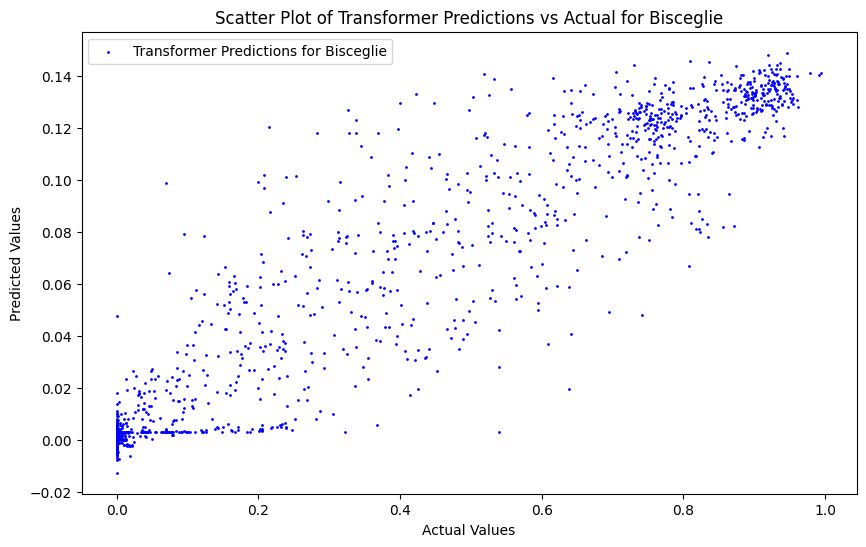

Training Transformer Model for Plant ID: Modica
Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.2143 - val_loss: 0.0188
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0464 - val_loss: 0.0143
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0259 - val_loss: 0.0125
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0211 - val_loss: 0.0117
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 0.0169
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0121
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 8/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0146 - val_loss: 0.0083
Epoch 9/50
200/200 [==============================] - 1s 3ms/step - loss: 0.0145 - val_loss: 0.0168
Epoch 10/50
200/200 [==============================]

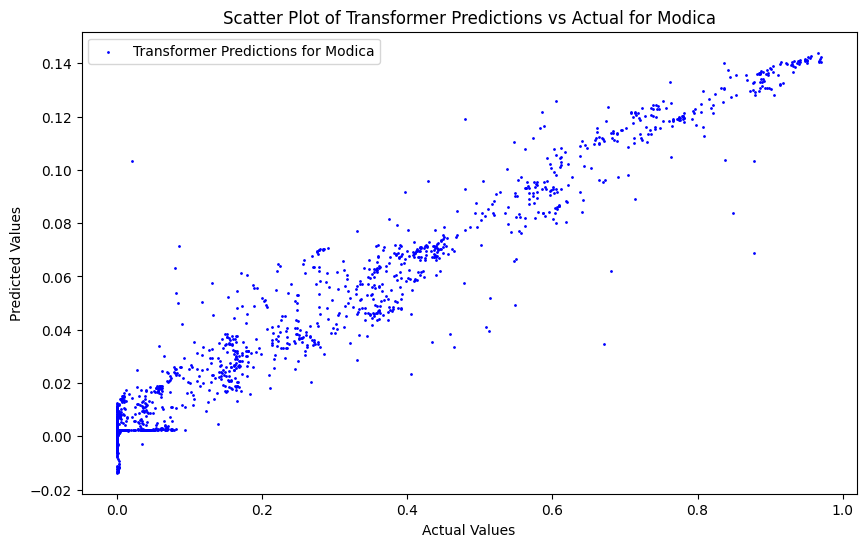

Training Transformer Model for Plant ID: Ortona
Epoch 1/50
208/208 [==============================] - 1s 3ms/step - loss: 0.1581 - val_loss: 0.0116
Epoch 2/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0375 - val_loss: 0.0124
Epoch 3/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0198 - val_loss: 0.0188
Epoch 4/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 0.0095
Epoch 5/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0111
Epoch 6/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0073
Epoch 7/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 0.0131
Epoch 8/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 0.0129
Epoch 9/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 0.0101
Epoch 10/50
208/208 [==============================]

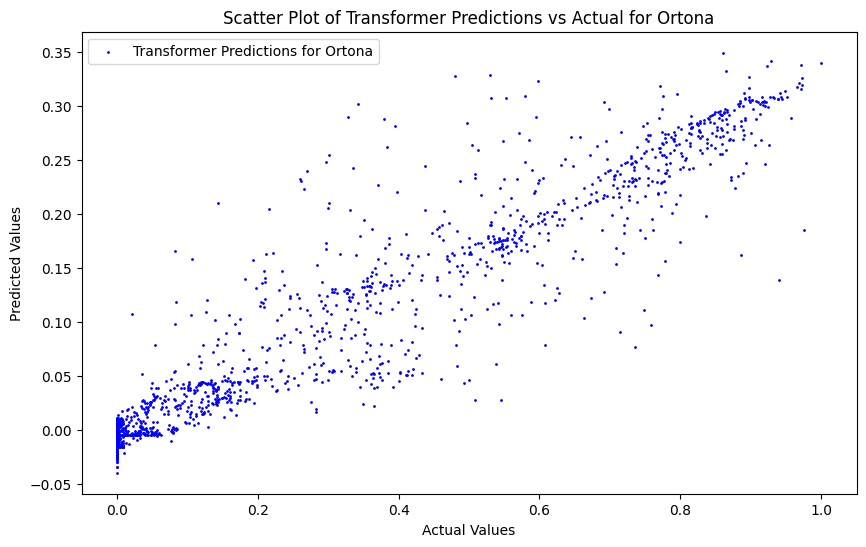

Training Transformer Model for Plant ID: SanCristoforo
Epoch 1/50
185/185 [==============================] - 1s 3ms/step - loss: 0.3500 - val_loss: 0.0204
Epoch 2/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0982 - val_loss: 0.0227
Epoch 3/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0417 - val_loss: 0.0187
Epoch 4/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0330 - val_loss: 0.0182
Epoch 5/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0278 - val_loss: 0.0147
Epoch 6/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0242 - val_loss: 0.0145
Epoch 7/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0214 - val_loss: 0.0186
Epoch 8/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0195 - val_loss: 0.0210
Epoch 9/50
185/185 [==============================] - 1s 3ms/step - loss: 0.0177 - val_loss: 0.0152
Epoch 10/50
185/185 [========================

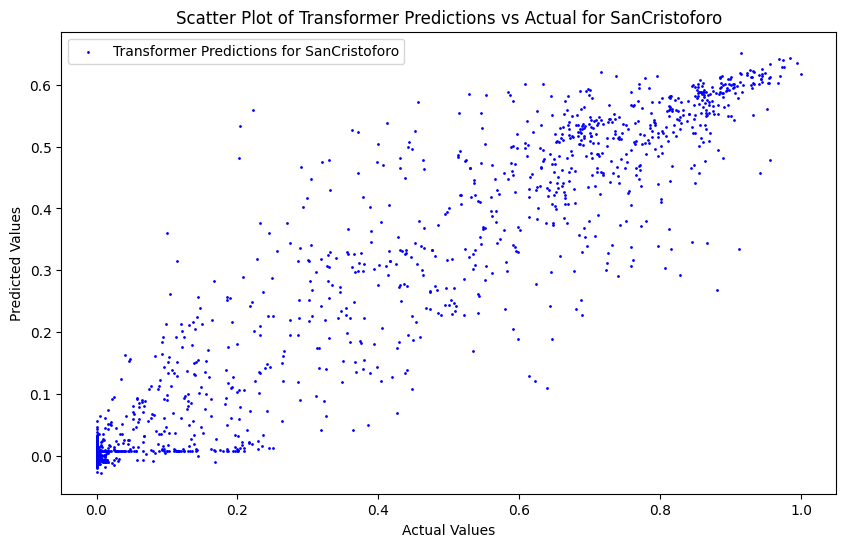

Training Transformer Model for Plant ID: MolinoCasilloTT
Epoch 1/50
208/208 [==============================] - 1s 3ms/step - loss: 0.2901 - val_loss: 0.0141
Epoch 2/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0878 - val_loss: 0.0121
Epoch 3/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0383 - val_loss: 0.0126
Epoch 4/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0263 - val_loss: 0.0079
Epoch 5/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0247 - val_loss: 0.0080
Epoch 6/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0231 - val_loss: 0.0095
Epoch 7/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0206 - val_loss: 0.0114
Epoch 8/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0079
Epoch 9/50
208/208 [==============================] - 1s 3ms/step - loss: 0.0191 - val_loss: 0.0111
Epoch 10/50
208/208 [======================

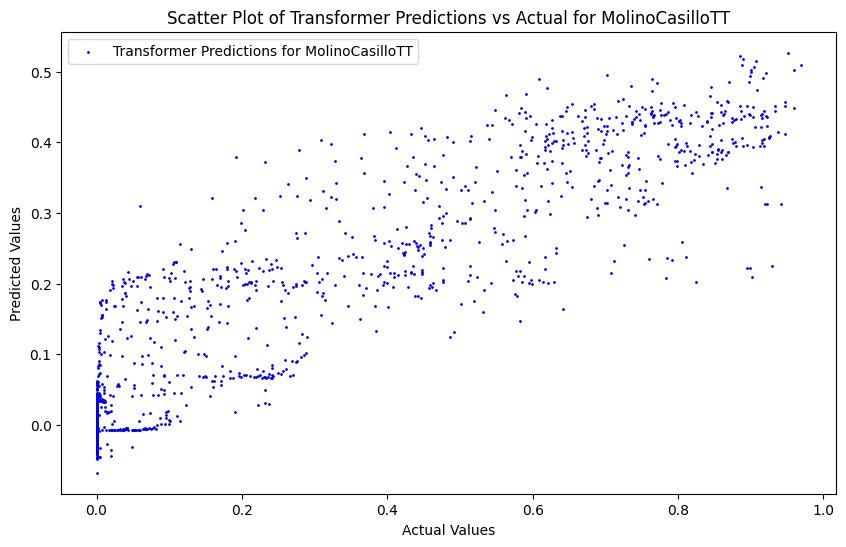

Training Transformer Model for Plant ID: Celso
Epoch 1/50
112/112 [==============================] - 1s 3ms/step - loss: 0.3031 - val_loss: 0.0577
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1085 - val_loss: 0.0654
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.0742
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.0641
Epoch 5/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0182 - val_loss: 0.0698
Epoch 6/50
112/112 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0654
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0698
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0147 - val_loss: 0.0535
Epoch 9/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0640
Epoch 10/50
112/112 [==============================] 

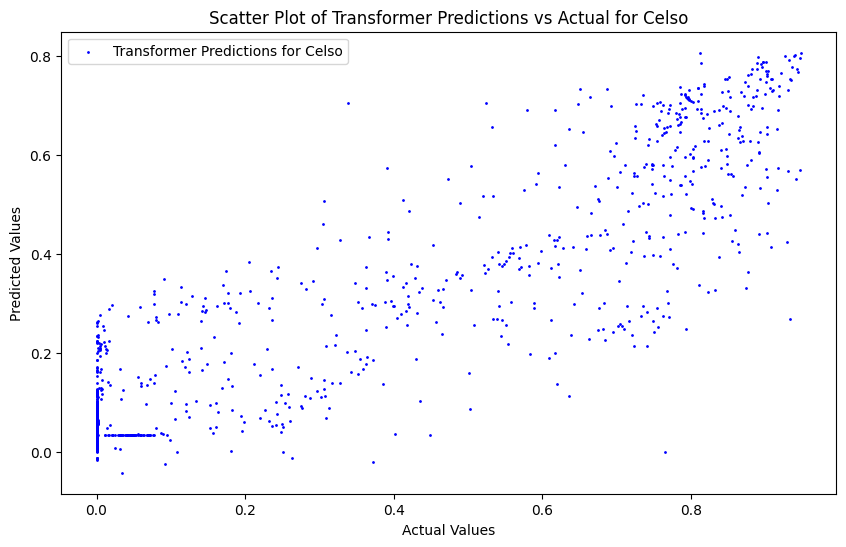

In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping


plant_ids = df['pID'].unique()  

# Scaling the target variable
scaler = MinMaxScaler()
df['Prd'] = scaler.fit_transform(df[['Prd']])  # Normalize Prd values

# Function to create dataset for Transformer
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define Transformer model
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(64)(inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    
    # Multi-head attention layer
    attention = MultiHeadAttention(num_heads=2, key_dim=64)
    x = attention(x, x)
    
    x = Dense(32, activation='relu')(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(0.1)(x)
    
    x = Flatten()(x)
    x = Dense(1)(x)
    
    model = Model(inputs, x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training Transformer Model for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    time_step = 10  # Adjust the time step as needed
    X, y = create_dataset(scaled_data, time_step)

    if len(X) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Reshape the data for Transformer
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split data
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build and train the model
    transformer_model = build_transformer_model((X_train.shape[1], 1))
    
    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    transformer_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)

    # Predictions
    y_pred_transformer = transformer_model.predict(X_test)

    # Inverse scaling
    y_pred_transformer_inverse = scaler.inverse_transform(y_pred_transformer)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_transformer_inverse)
    mape = mean_absolute_percentage_error(y_test, y_pred_transformer_inverse)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_transformer_inverse))
    r2 = r2_score(y_test, y_pred_transformer_inverse)

    print(f"Metrics for Plant ID {plant_id}:")
    print(f"MAE: {mae}, MAPE: {mape}, RMSE: {rmse}, R²: {r2}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_transformer_inverse, s=1, color='blue', label=f'Transformer Predictions for {plant_id}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Transformer Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()


# Forecasting +1 Hour 

Training models for Plant ID: Bisceglie
Epoch 1/50
208/208 [==============================] - 5s 8ms/step - loss: 0.0400 - val_loss: 0.0252
Epoch 2/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0191 - val_loss: 0.0150
Epoch 3/50
208/208 [==============================] - 1s 6ms/step - loss: 0.0128 - val_loss: 0.0110
Epoch 4/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 5/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 6/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 7/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 8/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 9/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 10/50
208/208 [==============================] - 1s 5m

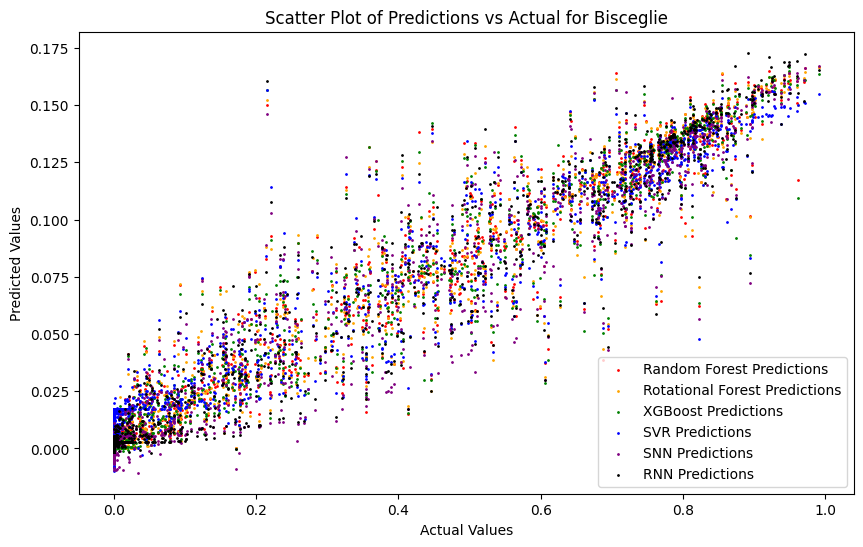

Training models for Plant ID: Modica
Epoch 1/50
200/200 [==============================] - 4s 10ms/step - loss: 0.0342 - val_loss: 0.0111
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0067
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0065 - val_loss: 0.0047
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 10/50
200/200 [==============================] - 1s 5ms/

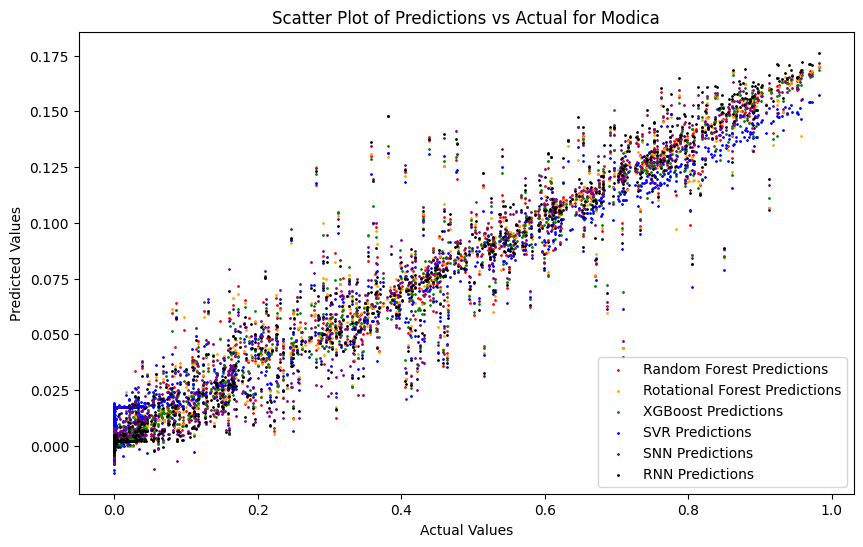

Training models for Plant ID: Ortona
Epoch 1/50
208/208 [==============================] - 4s 9ms/step - loss: 0.0320 - val_loss: 0.0128
Epoch 2/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0116 - val_loss: 0.0082
Epoch 3/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0067
Epoch 4/50
208/208 [==============================] - 1s 6ms/step - loss: 0.0075 - val_loss: 0.0065
Epoch 5/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 6/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 7/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 8/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0060 - val_loss: 0.0053
Epoch 9/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 10/50
208/208 [==============================] - 1s 5ms/s

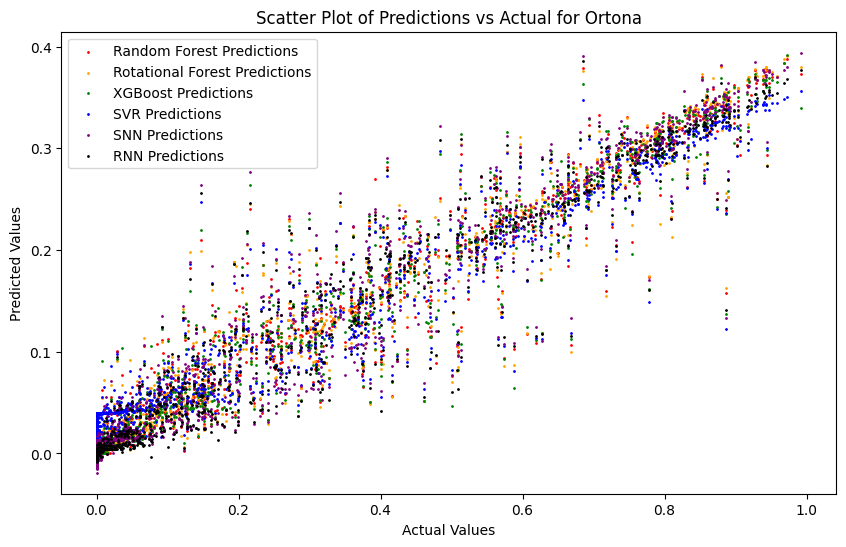

Training models for Plant ID: SanCristoforo
Epoch 1/50
185/185 [==============================] - 3s 8ms/step - loss: 0.0315 - val_loss: 0.0168
Epoch 2/50
185/185 [==============================] - 1s 6ms/step - loss: 0.0155 - val_loss: 0.0100
Epoch 3/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0111 - val_loss: 0.0079
Epoch 4/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0072
Epoch 5/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 6/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0069
Epoch 7/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 8/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0082 - val_loss: 0.0065
Epoch 9/50
185/185 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0060
Epoch 10/50
185/185 [==============================] - 1

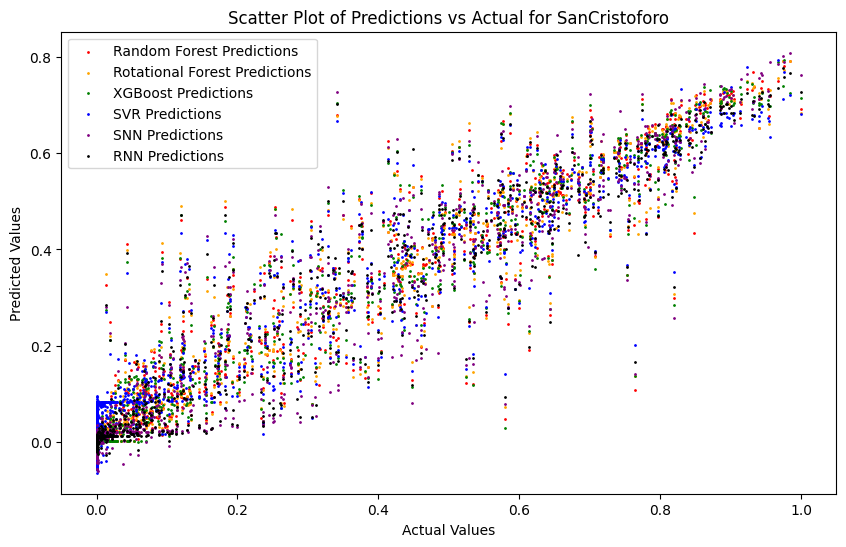

Training models for Plant ID: MolinoCasilloTT
Epoch 1/50
208/208 [==============================] - 4s 8ms/step - loss: 0.0388 - val_loss: 0.0208
Epoch 2/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0169 - val_loss: 0.0140
Epoch 3/50
208/208 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 0.0113
Epoch 4/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 5/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 6/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 7/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 8/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0093 - val_loss: 0.0090
Epoch 9/50
208/208 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 10/50
208/208 [==============================] -

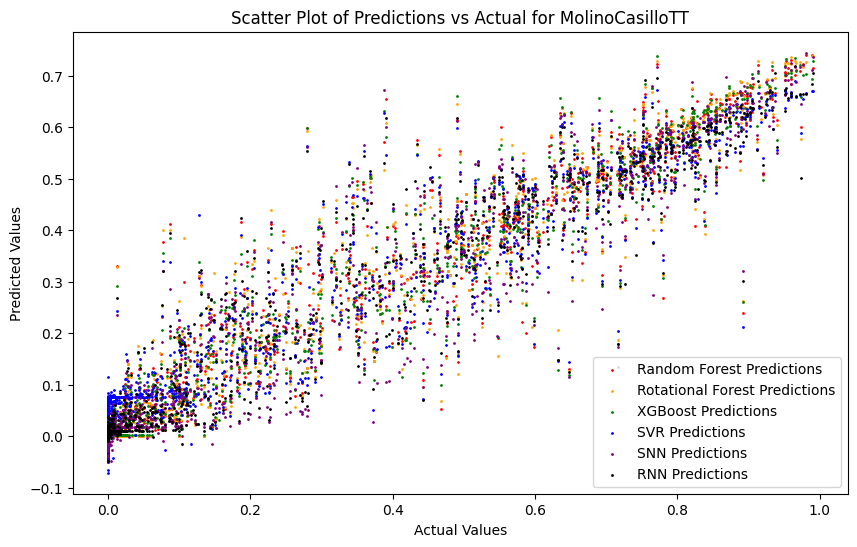

Training models for Plant ID: Celso
Epoch 1/50
112/112 [==============================] - 3s 12ms/step - loss: 0.0439 - val_loss: 0.0204
Epoch 2/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0212 - val_loss: 0.0154
Epoch 3/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0165 - val_loss: 0.0116
Epoch 4/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0136 - val_loss: 0.0102
Epoch 5/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0113 - val_loss: 0.0088
Epoch 6/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 7/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0103 - val_loss: 0.0079
Epoch 8/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 9/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 10/50
112/112 [==============================] - 1s 5ms/s

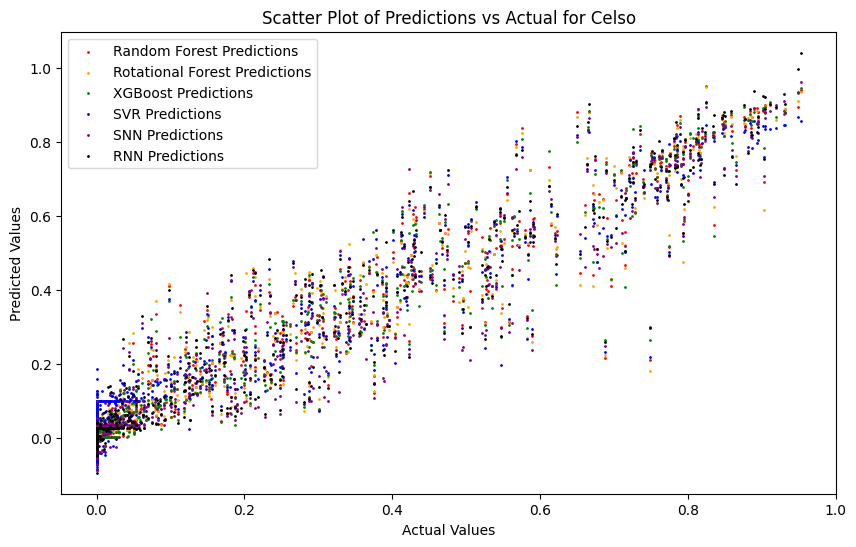

In [112]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df is your DataFrame containing the data
# df = pd.read_csv('your_data.csv') # Load your dataset

plant_ids = df['pID'].unique()

# Scaling the target variable
scaler = MinMaxScaler()
df['Prd'] = scaler.fit_transform(df[['Prd']])  # Normalize Prd values

# Function to create dataset for time series forecasting
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Initialize model storage
models = {}

# Iterate through each plant ID
for plant_id in plant_ids:
    print(f"Training models for Plant ID: {plant_id}")
    
    # Select data for the current plant
    plant_data = df[df['pID'] == plant_id]

    # Check if there's data for the plant
    if plant_data.empty:
        print(f"No data found for Plant ID: {plant_id}. Skipping...")
        continue

    # Normalize the data
    scaled_data = scaler.fit_transform(plant_data[['Prd']])
    time_step = 10  # Adjust the time step as needed
    X, y = create_dataset(scaled_data, time_step)

    # Check if the dataset is valid
    if len(X) == 0 or len(y) == 0:
        print(f"Not enough data to create dataset for Plant ID: {plant_id}. Skipping...")
        continue

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    models['Random Forest'] = rf_model

    # Train Rotational Forest model
    rotational_forest_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # Using Extra Trees as a placeholder for Rotational Forest
    rotational_forest_model.fit(X_train, y_train)
    models['Rotational Forest'] = rotational_forest_model

    # Train XGBoost model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_model.fit(X_train, y_train)
    models['XGBoost'] = xgb_model

    # Train Support Vector Regression model
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train, y_train)
    models['SVR'] = svr_model

    # Train Simple Neural Network (SNN)
    snn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    snn_model.fit(X_train, y_train)
    models['SNN'] = snn_model

    # Train Recurrent Neural Network (RNN)
    X_rnn = X.reshape(X.shape[0], X.shape[1], 1)  # Reshaping for RNN input
    X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y, test_size=0.2, random_state=42)
    
    rnn_model = Sequential()
    rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
    rnn_model.add(Dropout(0.2))
    rnn_model.add(LSTM(50))
    rnn_model.add(Dropout(0.2))
    rnn_model.add(Dense(1))

    rnn_model.compile(optimizer='adam', loss='mean_squared_error')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    rnn_model.fit(X_train_rnn, y_train_rnn, epochs=50, validation_split=0.2, callbacks=[early_stopping], verbose=1)
    models['RNN'] = rnn_model

    # Predictions
    y_pred_rf = rf_model.predict(X_test)
    y_pred_rotational = rotational_forest_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)
    y_pred_svr = svr_model.predict(X_test)
    y_pred_snn = snn_model.predict(X_test)
    y_pred_rnn = rnn_model.predict(X_test_rnn)

    # Inverse scaling predictions
    y_pred_rf_inverse = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))
    y_pred_rotational_inverse = scaler.inverse_transform(y_pred_rotational.reshape(-1, 1))
    y_pred_xgb_inverse = scaler.inverse_transform(y_pred_xgb.reshape(-1, 1))
    y_pred_svr_inverse = scaler.inverse_transform(y_pred_svr.reshape(-1, 1))
    y_pred_snn_inverse = scaler.inverse_transform(y_pred_snn.reshape(-1, 1))
    y_pred_rnn_inverse = scaler.inverse_transform(y_pred_rnn)

    # Calculate metrics
    metrics = {
        "Random Forest": {
            "MAE": mean_absolute_error(y_test, y_pred_rf_inverse),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred_rf_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_inverse)),
            "R²": r2_score(y_test, y_pred_rf_inverse)
        },
        "Rotational Forest": {
            "MAE": mean_absolute_error(y_test, y_pred_rotational_inverse),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred_rotational_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rotational_inverse)),
            "R²": r2_score(y_test, y_pred_rotational_inverse)
        },
        "XGBoost": {
            "MAE": mean_absolute_error(y_test, y_pred_xgb_inverse),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred_xgb_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb_inverse)),
            "R²": r2_score(y_test, y_pred_xgb_inverse)
        },
        "SVR": {
            "MAE": mean_absolute_error(y_test, y_pred_svr_inverse),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred_svr_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svr_inverse)),
            "R²": r2_score(y_test, y_pred_svr_inverse)
        },
        "SNN": {
            "MAE": mean_absolute_error(y_test, y_pred_snn_inverse),
            "MAPE": mean_absolute_percentage_error(y_test, y_pred_snn_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_snn_inverse)),
            "R²": r2_score(y_test, y_pred_snn_inverse)
        },
        "RNN": {
            "MAE": mean_absolute_error(y_test_rnn, y_pred_rnn_inverse),
            "MAPE": mean_absolute_percentage_error(y_test_rnn, y_pred_rnn_inverse),
            "RMSE": np.sqrt(mean_squared_error(y_test_rnn, y_pred_rnn_inverse)),
            "R²": r2_score(y_test_rnn, y_pred_rnn_inverse)
        }
    }

    # Print metrics
    print(f"Metrics for Plant ID {plant_id}:")
    for model_name, metric in metrics.items():
        print(f"{model_name}: MAE: {metric['MAE']}, MAPE: {metric['MAPE']}, RMSE: {metric['RMSE']}, R²: {metric['R²']}")

    # Plotting predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_rf_inverse, s=1, color='red', label='Random Forest Predictions')
    plt.scatter(y_test, y_pred_rotational_inverse, s=1, color='orange', label='Rotational Forest Predictions')
    plt.scatter(y_test, y_pred_xgb_inverse, s=1, color='green', label='XGBoost Predictions')
    plt.scatter(y_test, y_pred_svr_inverse, s=1, color='blue', label='SVR Predictions')
    plt.scatter(y_test, y_pred_snn_inverse, s=1, color='purple', label='SNN Predictions')
    plt.scatter(y_test_rnn, y_pred_rnn_inverse, s=1, color='black', label='RNN Predictions')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot of Predictions vs Actual for {plant_id}')
    plt.legend()
    plt.show()